In [4]:
!python -m pip install -U matplotlib
!python -m pip install -U numpy
!python -m pip install -U opencv-python

  Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.7 MB)


/tmp/ipykernel_5767/3086623714.py:10: RuntimeWarning: divide by zero encountered in divide
  transformed_img = 1 / (1 + k / img_normalized+0.0001)


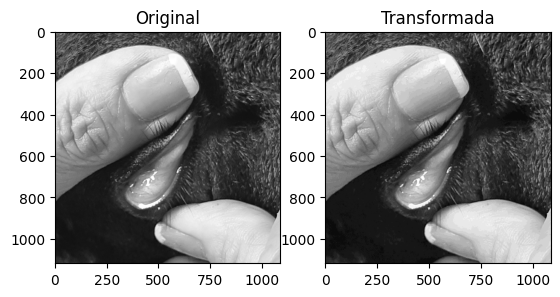

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def alargamento_contraste(img, k):

    # Normalização para valores entre 0 e 1 para cada canal
    img_normalized = img.astype(float) / 255.0
    
    # Aplicação da transformação não linear para cada canal
    transformed_img = 1 / (1 + k / img_normalized)
    
    # Reescala para valores entre 0 e 255
    transformed_img = (transformed_img * 255).astype(np.uint8)
    
    return transformed_img

#
# Carrega a imagem
imagem = cv2.imread('dados/2023-09-13&1105_2.jpg', cv2.IMREAD_GRAYSCALE)
# Parâmetro k para a transformação
k = 10

# Aplica a transformação de alargamento de contraste
imagem_transformada = alargamento_contraste(imagem, k)

# Mostra a imagem original e a imagem transformada
plt.subplot(1, 2, 1), plt.imshow(imagem, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(imagem_transformada, cmap='gray'), plt.title('Transformada')
plt.show()

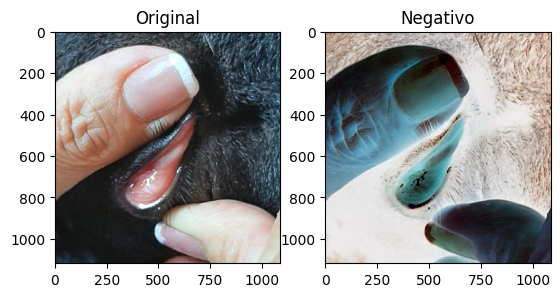

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def negativo_rgb(img):
    # Calcula o negativo para cada canal RGB
    negativo_img = 255 - img
    
    # Garante que os valores estejam no intervalo [0, 255]
    negativo_img = np.clip(negativo_img, 0, 255).astype(np.uint8)
    
    return negativo_img

# Carrega a imagem em RGB
imagem = cv2.imread('dados/2023-09-13&1105_2.jpg', cv2.IMREAD_COLOR)

# Aplica a transformação de negativo para cada canal RGB
imagem_negativa = negativo_rgb(imagem)

# Mostra a imagem original e a imagem transformada
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_negativa, cv2.COLOR_BGR2RGB)), plt.title('Negativo')
plt.show()


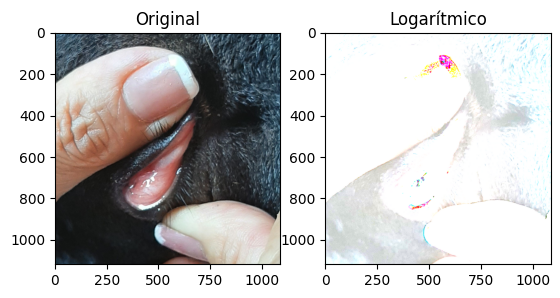

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def logaritmico_rgb(img, c):
    # Adiciona uma constante pequena para evitar log(0)
    epsilon = 1e-8
    
    # Aplica a transformação logarítmica para cada canal RGB
    logaritmico_img = c * np.log(1 + img + epsilon)
    
    # Garante que os valores estejam no intervalo [0, 255]
    logaritmico_img = np.clip(logaritmico_img, 0, 255).astype(np.uint8)
    
    return logaritmico_img

# Carrega a imagem em RGB
imagem = cv2.imread('dados/2023-09-13&1105_2.jpg', cv2.IMREAD_COLOR)

# Parâmetro c para a transformação logarítmica
c = 70

# Aplica a transformação logarítmica para cada canal RGB
imagem_logaritmica = logaritmico_rgb(imagem, c)

# Mostra a imagem original e a imagem transformada
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_logaritmica, cv2.COLOR_BGR2RGB)), plt.title('Logarítmico')
plt.show()


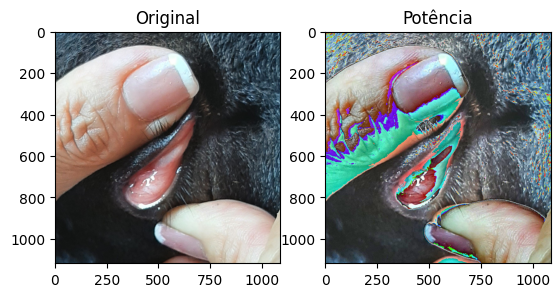

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def potencia_rgb(img, c, gamma):
    # Aplica a transformação por potência para cada canal RGB
    potencia_img = c * img**gamma
    
    # Garante que os valores estejam no intervalo [0, 255]
    potencia_img = np.clip(potencia_img, 0, 255).astype(np.uint8)
    
    return potencia_img

# Carrega a imagem em RGB
imagem = cv2.imread('dados/2023-09-13&1105_2.jpg', cv2.IMREAD_COLOR)

# Parâmetros c e gamma para a transformação por potência
c = 2
gamma = 1

# Aplica a transformação por potência para cada canal RGB
imagem_potencia = potencia_rgb(imagem, c, gamma)

# Mostra a imagem original e a imagem transformada
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imagem_potencia, cv2.COLOR_BGR2RGB)), plt.title('Potência')
plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calcular_histograma_rgb(imagem):
    # Dividir a imagem nas componentes de cor (canais R, G, B)
    canais = cv2.split(imagem)

    # Configurar o número de bins e os intervalos para os canais R, G, B
    bins = 256
    intervalos = [0, 256]

    # Calcular os histogramas para cada canal
    histograma_r = cv2.calcHist([canais[0]], [0], None, [bins], intervalos)
    histograma_g = cv2.calcHist([canais[1]], [0], None, [bins], intervalos)
    histograma_b = cv2.calcHist([canais[2]], [0], None, [bins], intervalos)

    return histograma_r, histograma_g, histograma_b

# Exemplo de uso:
imagem = cv2.imread('dados/2023-09-13&1105_2.jpg')
histograma_r, histograma_g, histograma_b = calcular_histograma_rgb(imagem)

histograma_rgb = histograma_r + histograma_g + histograma_b

mapeamento = alargamento_contraste_histograma(histograma_rgb)

# Visualizar os histogramas
plt.plot(histograma_r, color='red', label='Canal R')
plt.plot(histograma_g, color='green', label='Canal G')
plt.plot(histograma_b, color='blue', label='Canal B')
plt.plot(histograma_rgb, color='black', label='Canal RGB')

plt.title('Histograma RGB')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.legend()
plt.show()


TypeError: alargamento_contraste_histograma() missing 2 required positional arguments: 'a' and 'b'